# Using BERT-style models via ```Huggingface```
Looking at Huffpo headlines with topics over 10 years. 

## Creating ```HuggingFace``` pipelines


In [1]:
from transformers import pipeline
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/home/coder/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-28 12:14:19.611346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


So far, we've only been using the default models and parameters for these tasks. But if you check out the ```HuggingFace``` model universe, you'll see that there are many (in some cases hundreds) of finetuned models which can be slotted into these pipelines.

Check out the options [here](https://huggingface.co/models).

In [2]:
# load in the data
filename = os.path.join("..", "in", "News_Category_Dataset_v3.json")
data = pd.read_json(filename, lines=True)
# narrowing category to political headlines 
category = data.loc[data['category'] == 'POLITICS']
# Narrowing down to 20,000 political headlines
df = data.sample(n=20000)
# turning the headlines into a list of strings 
headlines = df['headline'].astype(str).values.tolist()
# turning the date column into just the year 
year = df['date'].dt.strftime('%Y')
# Create DataFrame with headlines, category labels, and the year 
#data = pd.DataFrame(list(zip(headlines, category, year)), columns=['headlines', 'category', 'year'])

In [3]:
# load in the model used for classification from hugging face 
classifier = pipeline("text-classification", 
                    model="j-hartmann/emotion-english-distilroberta-base", 
                    return_all_scores=False)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/coder/.local/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [4]:
# running the classifier on the headlines 
emotion = classifier(headlines)

In [5]:
# make dataframe with headlines, labels and top emotion
df = pd.DataFrame(list(zip(headlines,year, emotion)), columns=['title', 'year', 'emotion'])
df['emotion'] = df['emotion'].apply(lambda x: x['label'])

In [8]:
df.head()

,title,year,emotion
0,Letterman And George Clooney Eat Hamburgers In...,2018,neutral
1,Vegetative Patient Communicates By 'Answering'...,2013,neutral
2,Met Costume Institute 2013 Exhibit Revealed: '...,2012,disgust
3,"House Tour: Tanya Watson, 'Dans le Townhouse' ...",2012,neutral
4,There's A Sad Callback Coming On 'The Walking ...,2018,sadness


In [ ]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) # only takes the top emotion if set to false 

In [ ]:
# load in the data
filename = os.path.join("..", "in", "News_Category_Dataset_v3.json")
data = pd.read_json(filename, lines=True)

In [ ]:
# turning the headlines into a list of strings 
headlines = data['headline'].astype(str).values.tolist()
category = data['category']
# just taking the year from the date 
year = data['date'].dt.strftime('%Y')

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df = pd.DataFrame(list(zip(headlines, category, year)), columns=['headlines', 'category', 'year'])
# narrowing it down to just political stories 
df = df.loc[df['category'] == 'POLITICS']
df.head()
print(df)

In [ ]:
df = df.sample(n=25000)

In [ ]:
print(df)

So there are 35,602 rows of headlines 

# Sample to run through the code quickly 

In [ ]:
# gives a random sample to run on which would make it faster 
df = df.sample(n=25000)
# turning the headlines into a list of strings 
headlines = df['headlines'].astype(str).values.tolist()
category = df['category']
year = df['year'] 

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
sample_df = pd.DataFrame(list(zip(sample_headlines, sample_category, sample_year)), columns=['sample_headlines', 'sample_category', 'sample_year'])

sample_df.head()

In [ ]:
len(df['headlines'])

In [ ]:
# running the classifier 
emotion = classifier(headlines)


In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df_samp = pd.DataFrame(list(zip(sample_headlines, sample_year, emotion )), columns=['sample_headlines', 'sample_year', 'emotion'])
df_samp.head()

In [ ]:
# getting just the emotion label 
df_samp['emotion'] = df_samp['emotion'].apply(lambda x: x['label'])


In [ ]:
df_samp.head()

In [ ]:
# set categorical order
df_samp['emotion'] = pd.Categorical(df_samp['emotion'],
                                   categories=['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'],
                                   ordered=True)

In [9]:
# getting each year 
years = df['year'].unique()
# Create separate dataframes for each year
year_dataframes = {}
for year in years:
    year_dataframes[year] = df[df['year'] == year].copy()


In [10]:
print(years)

['2018' '2013' '2012' '2017' '2014' '2015' '2016' '2022' '2019' '2021'
 '2020']


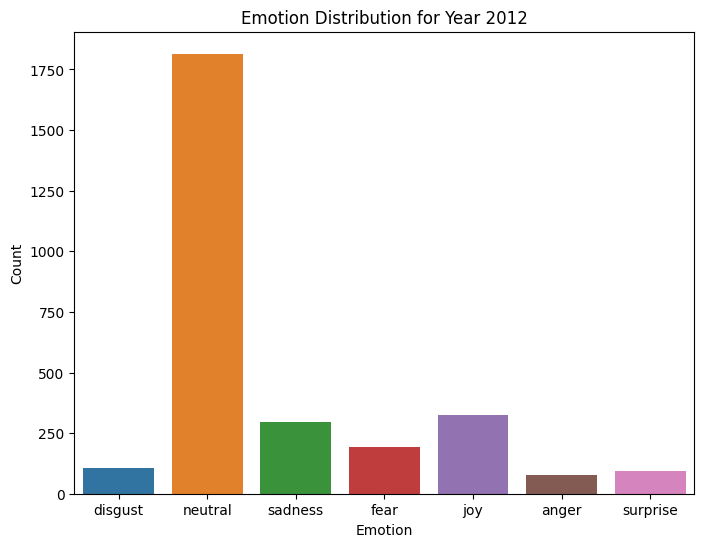

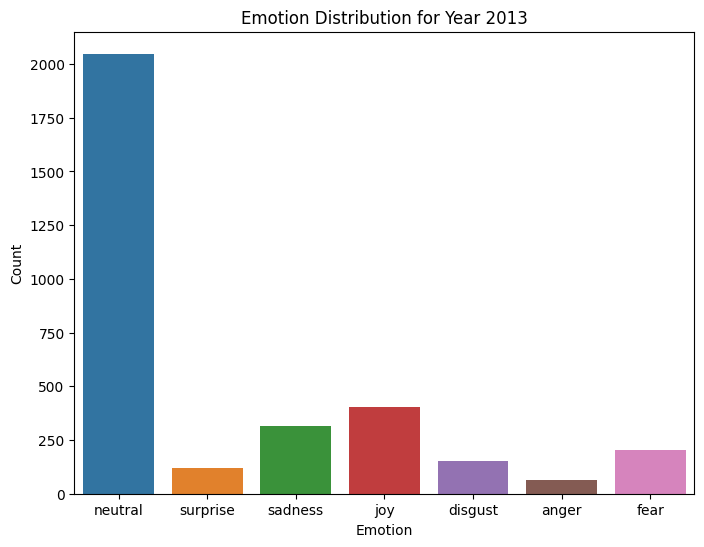

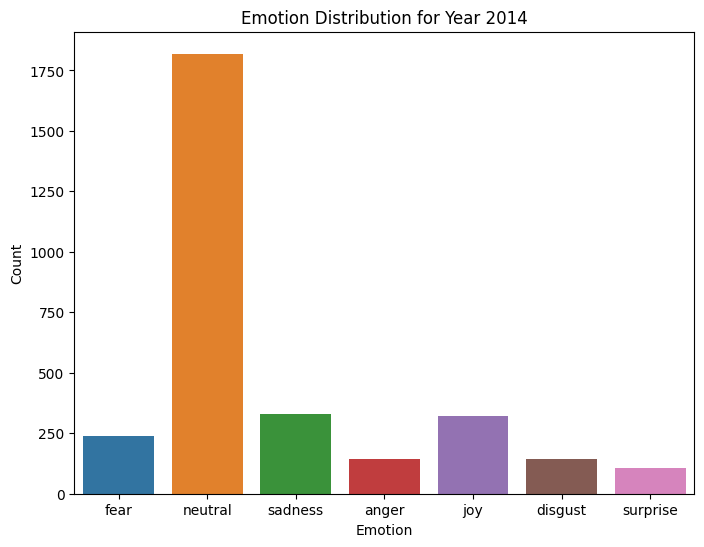

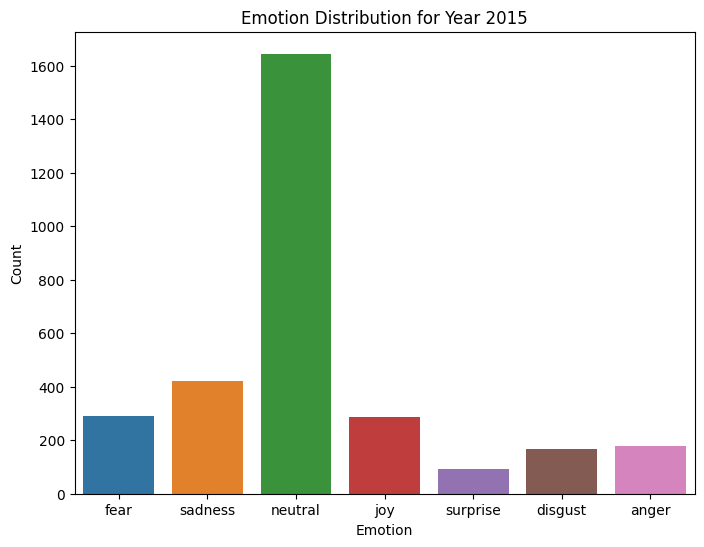

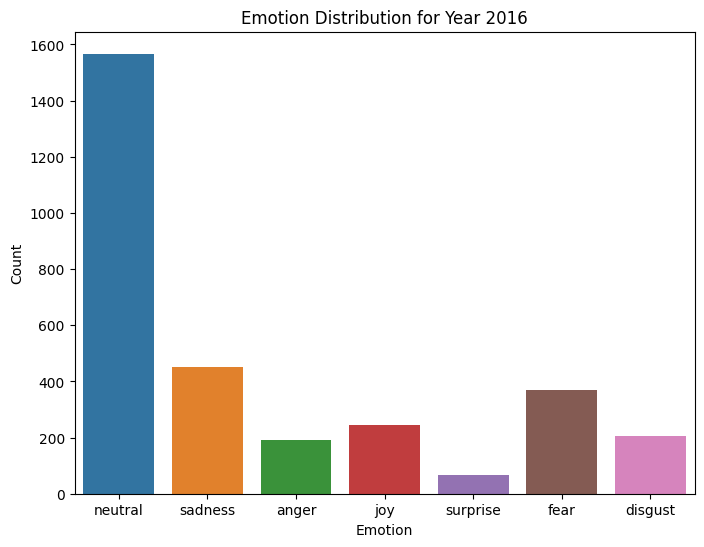

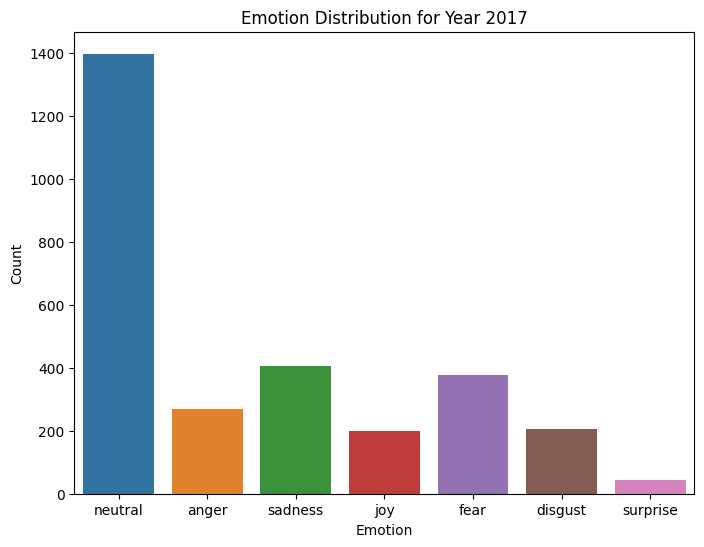

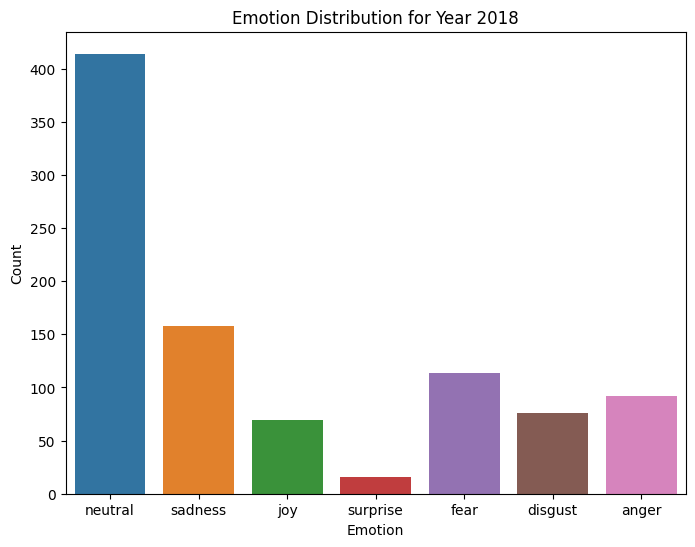

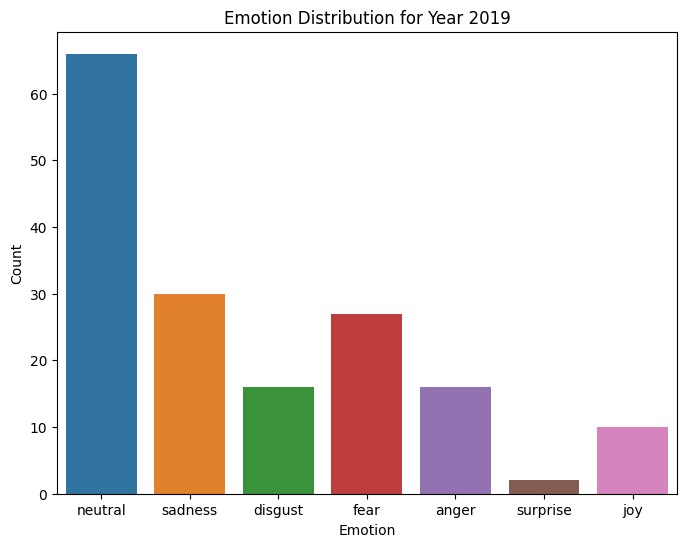

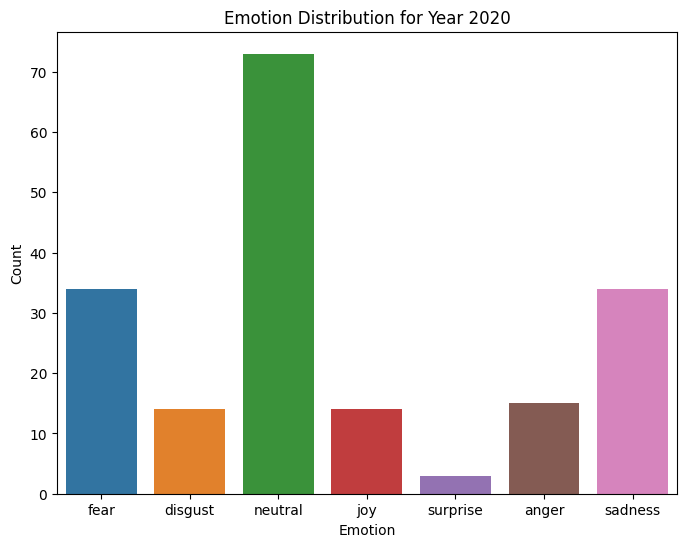

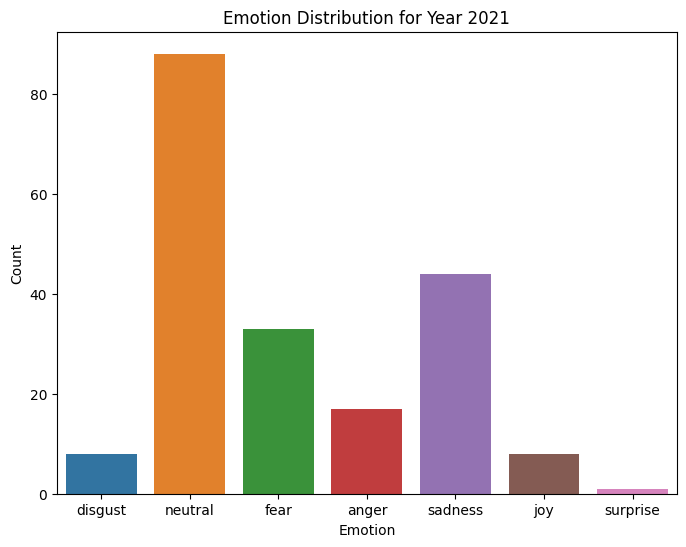

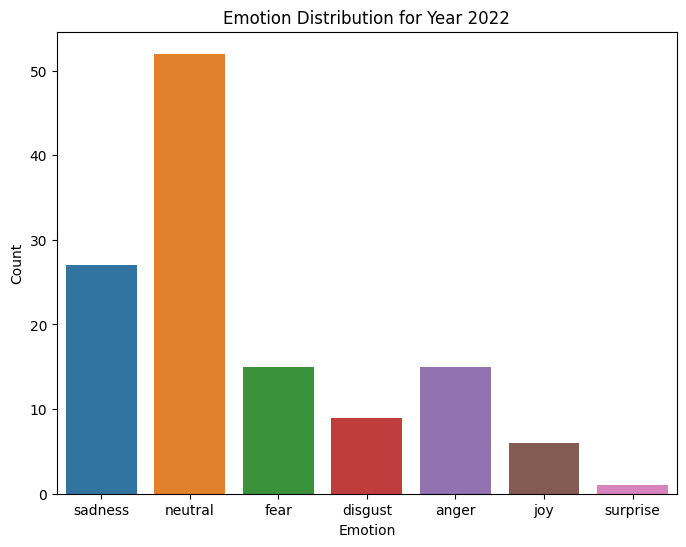

In [13]:

# Sort year_dataframes by keys (years) in ascending order
sorted_year_dataframes = sorted(year_dataframes.items(), key=lambda x: x[0])

# plotting count bar plots for each year 
for year, year_df in sorted_year_dataframes:
    plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
    
    sns.countplot(x='emotion', data=year_df)
    plt.title(f'Emotion Distribution for Year {year}')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    # Save the plot as an image file in the "out" folder
    plt.savefig(f'../out/bar_plot_{year}.png')
    
    plt.show()

In [ ]:
# Create an empty DataFrame to store the reports
reports_df = pd.DataFrame(columns=['Year', 'Emotion', 'Count'])

# Generate reports and populate the DataFrame
for year, year_df in year_dataframes.items():
    emotion_counts = year_df['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['Emotion', 'Count']
    emotion_counts['Year'] = year
    
    reports_df = pd.concat([reports_df, emotion_counts], ignore_index=True)

# Save the reports to CSV
reports_df.to_csv('emotion_reports.csv', index=False)

# Define the output folder path
output_folder = "../out"
output_path = os.path.join(output_folder, "emotion_reports.csv")
report = reports_df.to_csv(output_path, index=False)

# need to pip install tabulate 
from tabulate import tabulate

# Sort the DataFrame by the 'Year' column in ascending order
sorted_reports_df = reports_df.sort_values(by='Year')

# Convert the sorted DataFrame to a formatted table
table = tabulate(sorted_reports_df, headers='keys', tablefmt='fancy_grid')


# Save the table to a text file in the output folder
output_path = os.path.join(output_folder, "emotion_reports.txt")
with open(output_path, 'w') as file:
    file.write(table)

Making emotion report tables for each year separately 

In [ ]:
# Iterate over each unique year
for year in sorted(reports_df['Year'].unique()):
    # Filter the DataFrame for the current year
    year_df = reports_df[reports_df['Year'] == year]
    
    # Sort the filtered DataFrame by 'Emotion' column
    sorted_year_df = year_df.sort_values(by='Emotion')
    
    # Convert the sorted DataFrame to a formatted table
    table = tabulate(sorted_year_df, headers='keys', tablefmt='fancy_grid')
    
    # Define the output file path for the current year
    output_path = os.path.join(output_folder, f"emotion_reports_{year}.txt")
    
    # Save the table to a text file
    with open(output_path, 'w') as file:
        file.write(table)

In [ ]:
# create a dictionary to store separate dataframes
dfs_by_year = {}

# iterate over unique years in the 'sample_year' column
for year in df_samp['sample_year'].unique():
    # create a new dataframe for each year
    year_df = df_samp[df_samp['sample_year'] == year].copy()
    # store the dataframe in the dictionary with the year as the key
    dfs_by_year[year] = year_df

# make dataframes for each year using a for loop
for year in range(2014, 2023):
    df_name = f"df_{year}"
    df_year = dfs_by_year.get(str(year), pd.DataFrame())
    globals()[df_name] = df_year


In [ ]:
# create a list of the separate year dfs 
dataframes = [df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# define the emotions color palette
palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C']

# create a figure and axes for the subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

# iterate over the dataframes and axes together
for df, ax, year in zip(dataframes, axes, range(2014, 2023)):
    # Create the count plot for each DataFrame and assign it to the corresponding axis
    sns.countplot(x=df['emotion'], palette=palette, ax=ax).set(
        title=f"Emotions in {year} headlines", xlabel=None)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(30, 12))
ax1 = sns.countplot(x=df_2017['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax1).set(
    title="Emotions in 2017 headlines", xlabel=None)
ax2 = sns.countplot(x=df_2018['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax2).set(
    title="Emotions in 2018 headlines", xlabel=None)
ax3 = sns.countplot(x=df_2019['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax3).set(
    title="Emotions in 2019 headlines", xlabel=None)
ax4 = sns.countplot(x=df_2020['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax4).set(
    title="Emotions in 2020 headlines", xlabel=None)
ax5 = sns.countplot(x=df_2021['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax5).set(
    title="Emotions in 2021 headlines")
ax6 = sns.countplot(x=df_2022['emotion'], palette = ['#DDF1FF', '#AADDFF', '#88D0FF', '#56bdff','#3C84B2', '#2B5E7F', '#19384C'], ax=ax6).set(
    title="Emotions in 2022 headlines")
plt.show()

## Actual code to run - takes forever on less than a 64 machine, then it takes around an hour 

In [ ]:
emotion=classifier(headlines)

In [ ]:
# Create DataFrame with texts, predictions, labels, and scores
df1 = pd.DataFrame(list(zip(headlines, date, anger, disgust, fear, joy, neutral, sadness, surprise)), columns=['headlines', 'date', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise'])
df1.head()
print(df1)

In [ ]:
top_emotion = df1[['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']].idxmax(axis=1)

In [ ]:
#df1['year'] = df1['date'].dt.strftime('%Y')
year = df1['date'].dt.strftime('%Y')

In [ ]:
# Create DataFrame 
df = pd.DataFrame(list(zip(headlines, year, top_emotion)), columns=['headlines', 'year', 'emotion'])
df.head()
print(df)


## Visualizations

In [ ]:
# narrowing it down to just political stories 
#more_data = data.loc[data['category'] == 'POLITICS' or 'U.S. NEWS' or data.loc[data['category'] == 'WORLD NEWS'] 

options = ['POLITICS', 'U.S. NEWS', 'WORLD NEWS']
  
# selecting rows based on condition
more_df = data.loc[data['category'].isin(options)]

year = more_df['date'].dt.strftime('%Y')
headlines = data['headline'].astype(str).values.tolist()
category = data['category']

more_df = pd.DataFrame(list(zip(headlines,category, year)), columns=['headlines','category', 'year'])
more_df.head()

print(more_df['year'].unique())